In [17]:
#Lets import necessory libraries
import pandas as pd
import numpy as np

#For Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#For Visualization
import warnings
warnings.filterwarnings('ignore')

In [18]:
#Lets Load the dataset
data=pd.read_csv("car_price_scraped")
data.head()

Unnamed: 0.1  Unnamed: 0    Brand  Year_Model            Car_Name  \
0             0           0  HYUNDAI      2010.0             ['I10']   
1             1           1      KIA      2020.0          ['SELTOS']   
2             2           2      KIA      2020.0          ['SELTOS']   
3             3           3  Hyundai      2014.0  ['SANTRO', 'XING']   
4             4           4    Skoda      2021.0          ['KUSHAQ']   

              Model    Variant driven_kilometer    fuel number_of_owners  \
0           ERA 1.1     Manual        46,523 KM  PETROL        1ST OWNER   
1       GTX+ 1.4 MT     Manual         6,003 KM  PETROL        1ST OWNER   
2   GTX + AT PETROL  Automatic         9,417 KM  PETROL        1ST OWNER   
3           GL PLUS     Manual        43,944 KM  PETROL        1ST OWNER   
4  STYLE 1.5 TSI MT     Manual         7,182 KM  PETROL        1ST OWNER   

       Price Location  Manufacturing Year Driven Kilometer Fuel  \
0   1,68,000    Delhi                 NaN              NaN  NaN   
1  16,89,000    Delhi                 NaN              NaN  NaN   
2  16,73,000    Delhi                 NaN              NaN  NaN   
3   2,86,000    Delhi                 NaN              NaN  NaN   
4  17,01,000    Delhi                 NaN              NaN  NaN   

  Number of Owners  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN

In [19]:
#Lets check the shape of the dataset
data.shape

(8774, 16)

So, Here we have 8774 Rows and 16 Columns . Lets Remove Unnecessory Columns

In [20]:
data.drop(columns=['Unnamed: 0.1','Unnamed: 0','Manufacturing Year','Driven Kilometer','Fuel','Number of Owners'],inplace=True)

In [21]:
#Lets Check
data.tail()

Brand  Year_Model               Car_Name                  Model  \
8769  Maruti      2020.0     ['Suzuki', 'Eeco']  5 STR WITH AC PLUSHTR   
8770  Maruti      2022.0  ['Suzuki', 'Celerio']                    ZXI   
8771    Tata      2019.0       ['TIAGO', 'NRG']                 PETROL   
8772  MARUTI      2019.0     ['SUZUKI', 'ALTO']                    LXI   
8773  Maruti      2015.0     ['Suzuki', 'Ciaz']                    ZXI   

     Variant driven_kilometer    fuel number_of_owners     Price Location  
8769  Manual        29,553 KM  PETROL        1ST OWNER  4,78,000   Jaipur  
8770  Manual         7,910 KM  PETROL        1ST OWNER  5,68,000   Jaipur  
8771  Manual        35,787 KM  PETROL        1ST OWNER  4,85,000   Jaipur  
8772  Manual        37,369 KM  PETROL        1ST OWNER  3,27,000   Jaipur  
8773  Manual        24,565 KM  PETROL        1ST OWNER  6,33,000   Jaipur

In [22]:
#Lets check the shape of the dataset
data.shape

(8774, 10)

In [23]:
#Lets check for isnull
data.isna().sum()

Brand                  0
Year_Model          1222
Car_Name            1222
Model                  0
Variant               42
driven_kilometer    1222
fuel                1222
number_of_owners    1222
Price                  0
Location               0
dtype: int64

Lets drop null values . Because we fill by imputing technique so its giving wrong info.

In [24]:
data.dropna(inplace=True)

In [25]:
#Lets check the shape of the data
data.isna().sum()

Brand               0
Year_Model          0
Car_Name            0
Model               0
Variant             0
driven_kilometer    0
fuel                0
number_of_owners    0
Price               0
Location            0
dtype: int64

In [26]:
#Lets check the shape of the data
data.shape

(7510, 10)

In [27]:
#Lets check for duplicated value
data.duplicated().sum()

4

Lets delete Duplicates Columns

In [28]:
data.drop_duplicates(inplace=True)

We are dropping because . we all know if we update regurly our same car so its show in top . 

In [29]:
#Lets check 
data.shape

(7506, 10)

In [30]:
#Lets check for datatype of the datset
data.dtypes

Brand                object
Year_Model          float64
Car_Name             object
Model                object
Variant              object
driven_kilometer     object
fuel                 object
number_of_owners     object
Price                object
Location             object
dtype: object

So, Here we have 3 Int Columns and left are Object type . So here we can see that our target column is Object Datatype we have to convert in Int type

In [31]:
# Let's replace "," sign by empty space
data['Price'] = data['Price'].str.replace(',','')
# Let's convert data type of Price column to float
data['Price'] = data['Price'].astype('float')

In [32]:
#Lets check the data type of the dataset
data.dtypes

Brand                object
Year_Model          float64
Car_Name             object
Model                object
Variant              object
driven_kilometer     object
fuel                 object
number_of_owners     object
Price               float64
Location             object
dtype: object

So, Here we see that we converted sucessfully to float columns. and now we have to remove unncessory columns

In [33]:
data["Kilometer"] = data["driven_kilometer"].str.split().str[-2]
data

Brand  Year_Model               Car_Name                  Model  \
0     HYUNDAI      2010.0                ['I10']                ERA 1.1   
1         KIA      2020.0             ['SELTOS']            GTX+ 1.4 MT   
2         KIA      2020.0             ['SELTOS']        GTX + AT PETROL   
3     Hyundai      2014.0     ['SANTRO', 'XING']                GL PLUS   
4       Skoda      2021.0             ['KUSHAQ']       STYLE 1.5 TSI MT   
...       ...         ...                    ...                    ...   
8769   Maruti      2020.0     ['Suzuki', 'Eeco']  5 STR WITH AC PLUSHTR   
8770   Maruti      2022.0  ['Suzuki', 'Celerio']                    ZXI   
8771     Tata      2019.0       ['TIAGO', 'NRG']                 PETROL   
8772   MARUTI      2019.0     ['SUZUKI', 'ALTO']                    LXI   
8773   Maruti      2015.0     ['Suzuki', 'Ciaz']                    ZXI   

        Variant driven_kilometer    fuel number_of_owners      Price Location  \
0        Manual        46,523 KM  PETROL        1ST OWNER   168000.0    Delhi   
1        Manual         6,003 KM  PETROL        1ST OWNER  1689000.0    Delhi   
2     Automatic         9,417 KM  PETROL        1ST OWNER  1673000.0    Delhi   
3        Manual        43,944 KM  PETROL        1ST OWNER   286000.0    Delhi   
4        Manual         7,182 KM  PETROL        1ST OWNER  1701000.0    Delhi   
...         ...              ...     ...              ...        ...      ...   
8769     Manual        29,553 KM  PETROL        1ST OWNER   478000.0   Jaipur   
8770     Manual         7,910 KM  PETROL        1ST OWNER   568000.0   Jaipur   
8771     Manual        35,787 KM  PETROL        1ST OWNER   485000.0   Jaipur   
8772     Manual        37,369 KM  PETROL        1ST OWNER   327000.0   Jaipur   
8773     Manual        24,565 KM  PETROL        1ST OWNER   633000.0   Jaipur   

     Kilometer  
0       46,523  
1        6,003  
2        9,417  
3       43,944  
4        7,182  
...        ...  
8769    29,553  
8770     7,910  
8771    35,787  
8772    37,369  
8773    24,565  

[7506 rows x 11 columns]

In [34]:
#Lets Check the data.tail. and check column are deleted or not
data

Brand  Year_Model               Car_Name                  Model  \
0     HYUNDAI      2010.0                ['I10']                ERA 1.1   
1         KIA      2020.0             ['SELTOS']            GTX+ 1.4 MT   
2         KIA      2020.0             ['SELTOS']        GTX + AT PETROL   
3     Hyundai      2014.0     ['SANTRO', 'XING']                GL PLUS   
4       Skoda      2021.0             ['KUSHAQ']       STYLE 1.5 TSI MT   
...       ...         ...                    ...                    ...   
8769   Maruti      2020.0     ['Suzuki', 'Eeco']  5 STR WITH AC PLUSHTR   
8770   Maruti      2022.0  ['Suzuki', 'Celerio']                    ZXI   
8771     Tata      2019.0       ['TIAGO', 'NRG']                 PETROL   
8772   MARUTI      2019.0     ['SUZUKI', 'ALTO']                    LXI   
8773   Maruti      2015.0     ['Suzuki', 'Ciaz']                    ZXI   

        Variant driven_kilometer    fuel number_of_owners      Price Location  \
0        Manual        46,523 KM  PETROL        1ST OWNER   168000.0    Delhi   
1        Manual         6,003 KM  PETROL        1ST OWNER  1689000.0    Delhi   
2     Automatic         9,417 KM  PETROL        1ST OWNER  1673000.0    Delhi   
3        Manual        43,944 KM  PETROL        1ST OWNER   286000.0    Delhi   
4        Manual         7,182 KM  PETROL        1ST OWNER  1701000.0    Delhi   
...         ...              ...     ...              ...        ...      ...   
8769     Manual        29,553 KM  PETROL        1ST OWNER   478000.0   Jaipur   
8770     Manual         7,910 KM  PETROL        1ST OWNER   568000.0   Jaipur   
8771     Manual        35,787 KM  PETROL        1ST OWNER   485000.0   Jaipur   
8772     Manual        37,369 KM  PETROL        1ST OWNER   327000.0   Jaipur   
8773     Manual        24,565 KM  PETROL        1ST OWNER   633000.0   Jaipur   

     Kilometer  
0       46,523  
1        6,003  
2        9,417  
3       43,944  
4        7,182  
...        ...  
8769    29,553  
8770     7,910  
8771    35,787  
8772    37,369  
8773    24,565  

[7506 rows x 11 columns]

In [35]:
#Lets drop driven_kilometer
data.drop(columns=['driven_kilometer'],inplace=True)

So, Here we confirm . We can Delted Unncessory Columns

In [36]:
data.head()

Brand  Year_Model            Car_Name             Model    Variant  \
0  HYUNDAI      2010.0             ['I10']           ERA 1.1     Manual   
1      KIA      2020.0          ['SELTOS']       GTX+ 1.4 MT     Manual   
2      KIA      2020.0          ['SELTOS']   GTX + AT PETROL  Automatic   
3  Hyundai      2014.0  ['SANTRO', 'XING']           GL PLUS     Manual   
4    Skoda      2021.0          ['KUSHAQ']  STYLE 1.5 TSI MT     Manual   

     fuel number_of_owners      Price Location Kilometer  
0  PETROL        1ST OWNER   168000.0    Delhi    46,523  
1  PETROL        1ST OWNER  1689000.0    Delhi     6,003  
2  PETROL        1ST OWNER  1673000.0    Delhi     9,417  
3  PETROL        1ST OWNER   286000.0    Delhi    43,944  
4  PETROL        1ST OWNER  1701000.0    Delhi     7,182

In [37]:
#Lets conver Kilometer in int 
# Let's replace "," sign by empty space
data['Kilometer'] = data['Kilometer'].str.replace(',','')
# Let's convert data type of Price column to float
data['Kilometer'] = data['Kilometer'].astype('float')

In [38]:
#Lets check the info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7506 entries, 0 to 8773
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             7506 non-null   object 
 1   Year_Model        7506 non-null   float64
 2   Car_Name          7506 non-null   object 
 3   Model             7506 non-null   object 
 4   Variant           7506 non-null   object 
 5   fuel              7506 non-null   object 
 6   number_of_owners  7506 non-null   object 
 7   Price             7506 non-null   float64
 8   Location          7506 non-null   object 
 9   Kilometer         7506 non-null   float64
dtypes: float64(3), object(7)
memory usage: 645.0+ KB


# EDA
# Data Visualization 

# Univariate Analysis

In [39]:
data.replace(to_replace="MARUTI",
           value="Maruti",inplace=True)

In [40]:
data.replace(to_replace="HYUNDAI",
           value="Hyundai",inplace=True)

In [41]:
data.replace(to_replace="HONDA",
           value="Honda",inplace=True)

In [42]:
data.replace(to_replace="TATA",
           value="Tata",inplace=True)

In [43]:
data.replace(to_replace="RENAULT",
           value="Renault",inplace=True)

In [44]:
data.replace(to_replace="TOYOTA",
           value="Toyota",inplace=True)

In [45]:
data.replace(to_replace="MAHINDRA",
           value="Mahindra",inplace=True)

In [46]:
data.replace(to_replace="FORD",
           value="Ford",inplace=True)

In [47]:
data.replace(to_replace="VOLKSWAGEN",
           value="Volkswagen",inplace=True)

In [48]:
data.replace(to_replace="SKODA",
           value="Skoda",inplace=True)

In [49]:
data.replace(to_replace="DATSUN",
           value="DATSUN",inplace=True)

In [50]:
data.replace(to_replace="DATSUN",
           value="Datsun",inplace=True)

In [51]:
data.replace(to_replace="NISSAN",
           value="Nissan",inplace=True)

In [52]:
data.replace(to_replace="FIAT",
           value="Fiat",inplace=True)

Here we can. Separate all the Brand name .For better Visualization

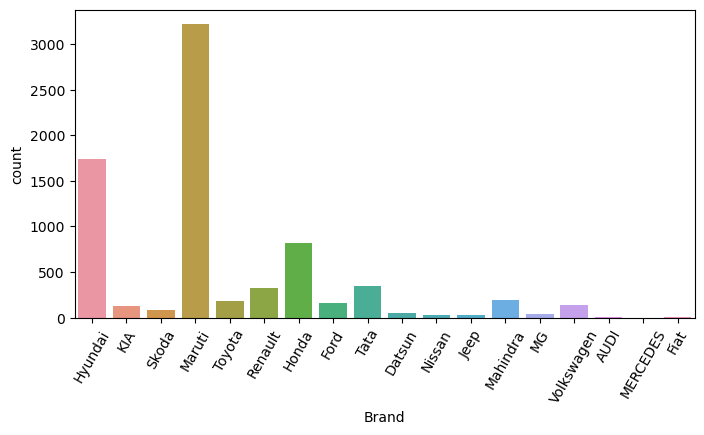

Maruti        3219
Hyundai       1741
Honda          823
Tata           352
Renault        330
Mahindra       190
Toyota         184
Ford           161
Volkswagen     139
KIA            127
Skoda           82
Datsun          49
MG              37
Nissan          33
Jeep            26
AUDI            10
Fiat             2
MERCEDES         1
Name: Brand, dtype: int64

In [53]:
#Lets plot Brand
plt.figure(figsize=(8,4))
sns.countplot(x='Brand',data=data)
plt.xticks(rotation=60)
plt.show()
data.Brand.value_counts()

Here, We can see that Maximum car Come from Maruti then Hyundai . and Less car come from SKODA , Mercedes , Fiat

In [84]:
#Lets Group By the Model name
pd.set_option('display.max_colwidth', None)
data.groupby(by='Car_Name').size()


Car_Name
['A3']                                    3
['A6']                                    1
['ALCAZAR']                               2
['ALTO', '800']                           1
['ALTO', 'K10']                           3
['ALTO']                                  1
['ALTROZ']                               68
['AMAZE']                                65
['AMEO']                                  6
['ASTOR']                                 1
['AURA']                                 28
['AVVVENTURA']                            1
['Alto', '800']                           3
['Alto']                                  6
['Amaze']                               139
['Ameo']                                 17
['BALENO']                                9
['BENZ', 'E', 'CLASS']                    1
['BOLERO', 'NEO']                         1
['BOLERO']                                6
['BR-V']                                  4
['BRIO']                                  9
['Baleno']             

In [89]:
#Lets  Check By Car Name .
data.groupby(['Brand','Car_Name'], as_index=False)['Model'].sum()

Brand                              Car_Name  \
0          AUDI                                ['A3']   
1          AUDI                                ['A6']   
2          AUDI                                ['Q3']   
3          AUDI                                ['Q5']   
4        Datsun                        ['Go', 'Plus']   
5        Datsun                                ['Go']   
6        Datsun                        ['REDI', 'GO']   
7        Datsun                        ['Redi', 'Go']   
8          Fiat                        ['AVVVENTURA']   
9          Fiat                    ['URBAN', 'CROSS']   
10         Ford                          ['ECOSPORT']   
11         Ford                         ['ENDEAVOUR']   
12         Ford                          ['Ecosport']   
13         Ford                         ['Endeavour']   
14         Ford                    ['FIGO', 'ASPIRE']   
15         Ford                         ['FREESTYLE']   
16         Ford                    ['Figo', 'Aspire']   
17         Ford                       ['New', 'Figo']   
18        Honda                             ['AMAZE']   
19        Honda                             ['Amaze']   
20        Honda                              ['BR-V']   
21        Honda                              ['BRIO']   
22        Honda                              ['Brio']   
23        Honda                              ['CITY']   
24        Honda                             ['CIVIC']   
25        Honda                               ['CRV']   
26        Honda                              ['City']   
27        Honda                             ['Civic']   
28        Honda                              ['JAZZ']   
29        Honda                              ['Jazz']   
30        Honda                              ['WR-V']   
31      Hyundai                           ['ALCAZAR']   
32      Hyundai                              ['AURA']   
33      Hyundai                             ['CRETA']   
34      Hyundai                             ['Creta']   
35      Hyundai                      ['ELITE', 'I20']   
36      Hyundai                               ['EON']   
37      Hyundai                      ['Elite', 'i20']   
38      Hyundai                               ['Eon']   
39      Hyundai              ['GRAND', 'I10', 'NIOS']   
40      Hyundai                      ['GRAND', 'I10']   
41      Hyundai                      ['Grand', 'i10']   
42      Hyundai                               ['I10']   
43      Hyundai                     ['I20', 'ACTIVE']   
44      Hyundai                               ['I20']   
45      Hyundai                    ['NEW', 'ELANTRA']   
46      Hyundai           ['NEW', 'I20', 'N', 'LINE']   
47      Hyundai                        ['NEW', 'I20']   
48      Hyundai                     ['NEW', 'SANTRO']   
49      Hyundai                    ['New', 'Elantra']   
50      Hyundai                    ['SANTRO', 'XING']   
51      Hyundai                    ['Santro', 'Xing']   
52      Hyundai                     ['TUCSON', 'NEW']   
53      Hyundai                     ['Tucson', 'New']   
54      Hyundai                             ['VENUE']   
55      Hyundai                             ['VERNA']   
56      Hyundai                             ['Verna']   
57      Hyundai                             ['XCENT']   
58      Hyundai                             ['Xcent']   
59      Hyundai                               ['i10']   
60      Hyundai                     ['i20', 'Active']   
61      Hyundai                               ['i20']   
62         Jeep                           ['Compass']   
63          KIA                            ['CARENS']   
64          KIA                            ['SELTOS']   
65          KIA                             ['SONET']   
66     MERCEDES                ['BENZ', 'E', 'CLASS']   
67           MG                             ['ASTOR']   
68           MG                    ['HECTOR', 'PLUS']   
69           MG     

In [88]:
#Lets See by Brand Name
pd.set_option('display.max_colwidth', None)
data.groupby(['Brand'], as_index=False)['Car_Name'].sum()

Brand  \
0         AUDI   
1       Datsun   
2         Fiat   
3         Ford   
4        Honda   
5      Hyundai   
6         Jeep   
7          KIA   
8     MERCEDES   
9           MG   
10    Mahindra   
11      Maruti   
12      Nissan   
13     Renault   
14       Skoda   
15        Tata   
16      Toyota   
17  Volkswagen   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [158]:
data.

Index(['Brand', 'Year_Model', 'Car_Name', 'Model', 'Variant', 'fuel',
       'number_of_owners', 'Price', 'Location', 'Kilometer'],
      dtype='object')

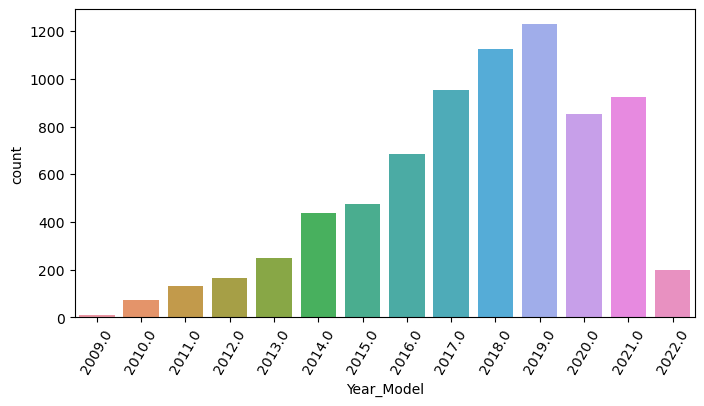

2019.0    1230
2018.0    1126
2017.0     953
2021.0     924
2020.0     852
2016.0     683
2015.0     477
2014.0     438
2013.0     251
2022.0     198
2012.0     163
2011.0     130
2010.0      72
2009.0       9
Name: Year_Model, dtype: int64

In [159]:
#Lets plot Year Model
plt.figure(figsize=(8,4))
sns.countplot(x='Year_Model',data=data)
plt.xticks(rotation=60)
plt.show()
data.Year_Model.value_counts()

Here, We can see that maximum car sell from 2019 then 2018 and less car come from 2009.

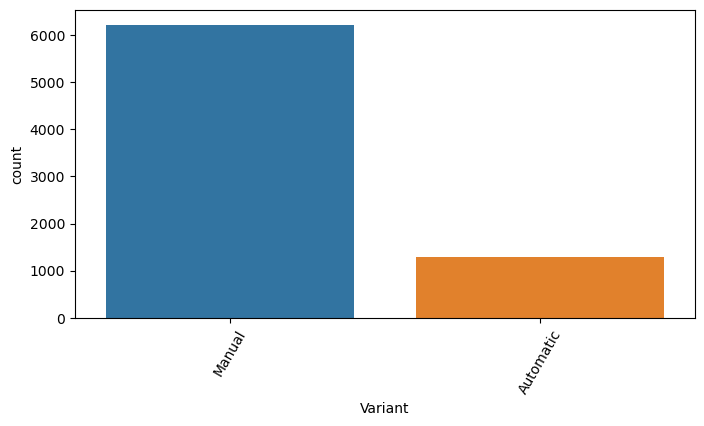

Manual       6222
Automatic    1284
Name: Variant, dtype: int64

In [160]:
#Lets plot Variant

plt.figure(figsize=(8,4))
sns.countplot(x='Variant',data=data)
plt.xticks(rotation=60)
plt.show()
data.Variant.value_counts()

Here , We can see that Maximum car is Manual and Less are Automatic

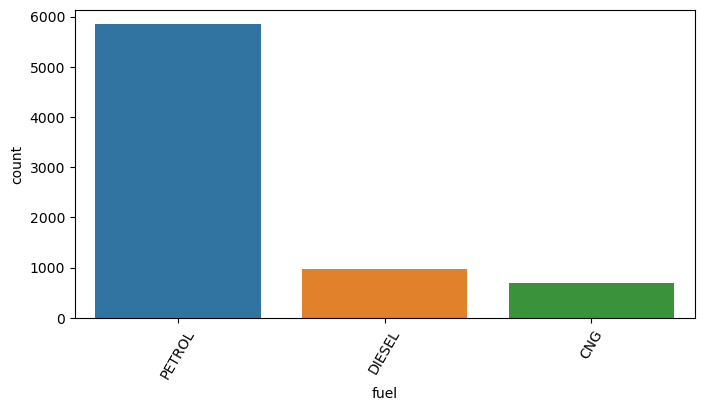

PETROL    5845
DIESEL     978
CNG        683
Name: fuel, dtype: int64

In [161]:
#Lets plot fuel

plt.figure(figsize=(8,4))
sns.countplot(x='fuel',data=data)
plt.xticks(rotation=60)
plt.show()
data.fuel.value_counts()

Here , We can see that Maximum car are petrol then Diesel then CNG

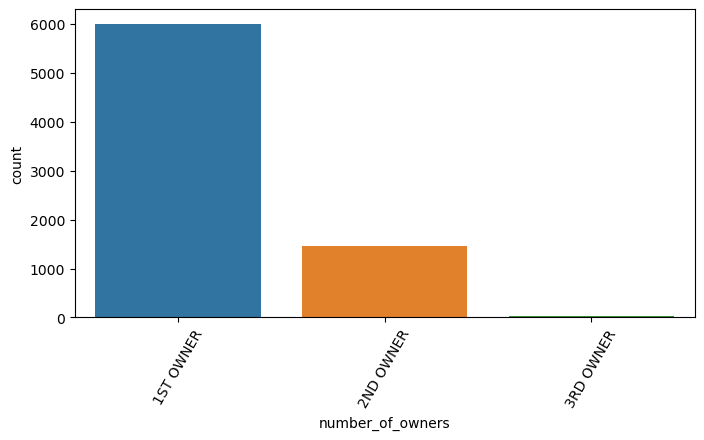

1ST OWNER    6003
2ND OWNER    1467
3RD OWNER      36
Name: number_of_owners, dtype: int64

In [163]:

#Lets plot number_of_owners

plt.figure(figsize=(8,4))
sns.countplot(x='number_of_owners',data=data)
plt.xticks(rotation=60)
plt.show()
data.number_of_owners.value_counts()

Here , We can see that Maximum car are from 1st Owner then 2nd Owner then 3rd

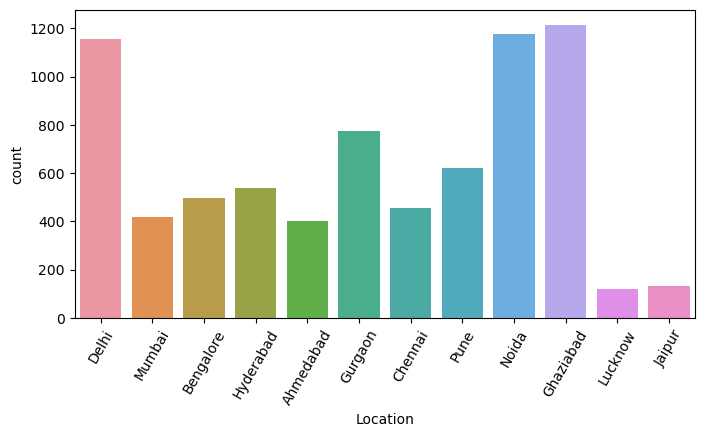

Ghaziabad    1216
Noida        1175
Delhi        1156
Gurgaon       774
Pune          623
Hyderabad     537
Bengalore     498
Chennai       456
Mumbai        419
Ahmedabad     402
Jaipur        131
Lucknow       119
Name: Location, dtype: int64

In [164]:

#Lets plot Location

plt.figure(figsize=(8,4))
sns.countplot(x='Location',data=data)
plt.xticks(rotation=60)
plt.show()
data.Location.value_counts()

Here , We can see that Maximum car sell from Ghaziabad then Noida then Delhi and  Less Car sell From Lucknow

<AxesSubplot:xlabel='Kilometer', ylabel='Count'>

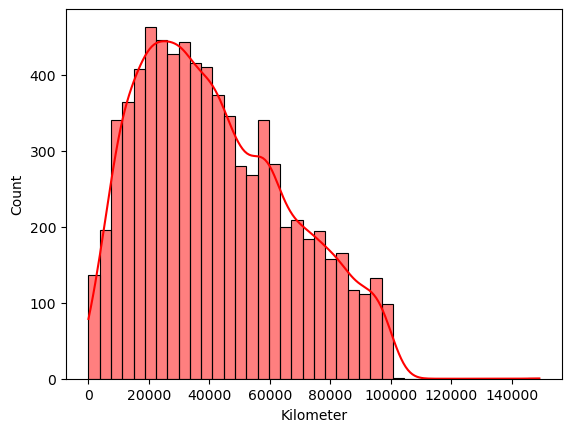

In [165]:
#Lets plot Kilometer
sns.histplot(data['Kilometer'],kde=True,color='red',)

Here , We can see that Maximum car are run 20000 to 60000

<AxesSubplot:xlabel='Price', ylabel='Density'>

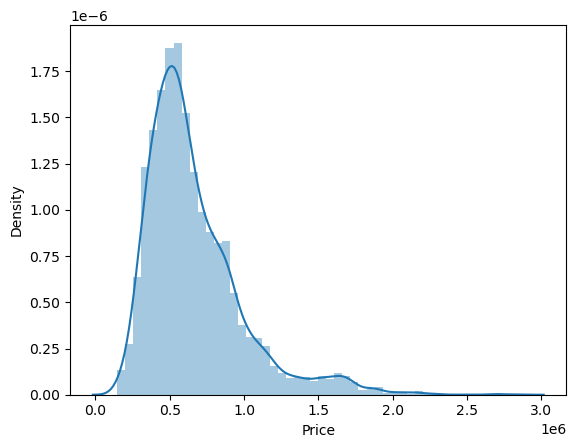

In [166]:
#Lets plot Price
sns.distplot(data['Price'])

Here We can see that the Price Columns is Normally Distributed

# Bivariate  Analysis

In [167]:
data.columns

Index(['Brand', 'Year_Model', 'Car_Name', 'Model', 'Variant', 'fuel',
       'number_of_owners', 'Price', 'Location', 'Kilometer'],
      dtype='object')

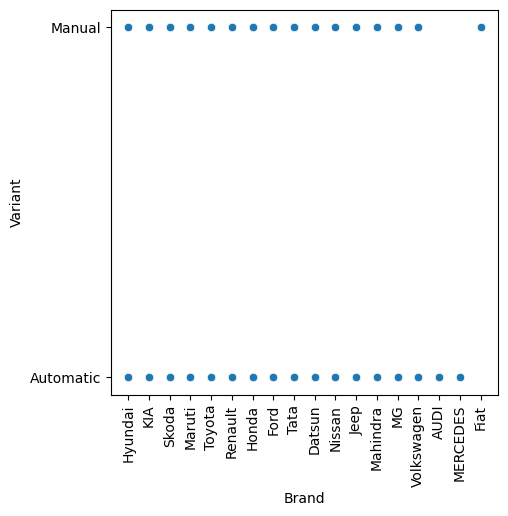

In [168]:
#Lets plot Brand Name.With Variant
plt.figure(figsize=(5,5))
sns.scatterplot(x='Brand',y='Variant',data=data)
plt.xticks(rotation=90)
plt.show()

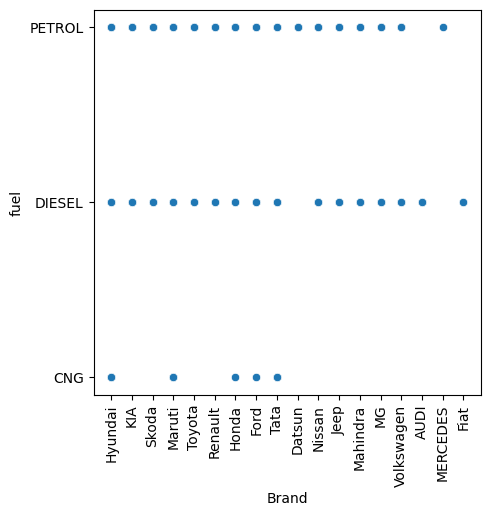

In [169]:
#Lets plot Brand Name with Fuel
plt.figure(figsize=(5,5))
sns.scatterplot(x='Brand',y='fuel',data=data)
plt.xticks(rotation=90)
plt.show()

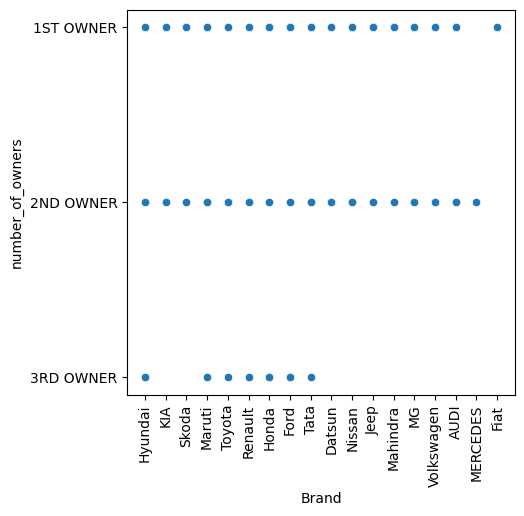

In [170]:
#Lets plot Brand Name with number_of_owners
plt.figure(figsize=(5,5))
sns.scatterplot(x='Brand',y='number_of_owners',data=data)
plt.xticks(rotation=90)
plt.show()

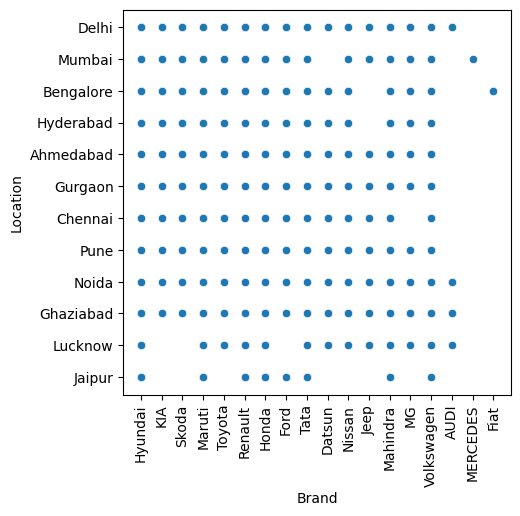

In [171]:
#Lets plot Brand Name with Location
plt.figure(figsize=(5,5))
sns.scatterplot(x='Brand',y='Location',data=data)
plt.xticks(rotation=90)
plt.show()

In [172]:
#Lets plot Brand Name with Kilometer
plt.figure(figsize=(5,5))
sns.barplot(x='Brand',y='Kilometer',data=data)
plt.xticks(rotation=90)
plt.show()

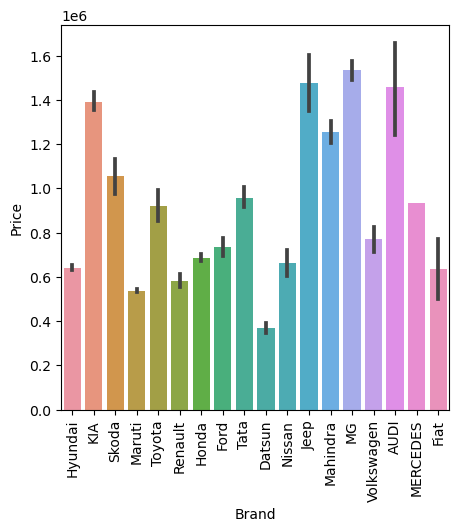

In [173]:
#Lets plot Brand Name with Price
plt.figure(figsize=(5,5))
sns.barplot(x='Brand',y='Price',data=data)
plt.xticks(rotation=90)
plt.show()

Here we can see that Costly Car come from Mercedes , KIA , MG and Jeep and For Middle Class Car Comes From Maruti , Hyundai , Tata and Many More

In [174]:
#Lets plot Brand Name with Year Model
plt.figure(figsize=(5,5))
sns.histplot(x='Brand',y='Year_Model',data=data,color='green')
plt.xticks(rotation=90)
plt.show()

So, Here We can see that Maruti and Hyundai car come from last 15 Year .

In [175]:
data.replace(to_replace="SUZUKI",
           value="Suzuki",inplace=True)

In [176]:
#Lets plot Brand Name with Year Model
plt.figure(figsize=(5,5))
sns.histplot(x='Brand',y='Car_Name',data=data,color='green')
plt.xticks(rotation=90)
plt.yticks(size=0.5)
plt.show()

In [177]:
#Lets plot Brand Name with Year Model
plt.figure(figsize=(5,5))
sns.histplot(x='Brand',y='Car_Name',data=data,color='green')
plt.xticks(rotation=90)
plt.yticks(size=0.5)
plt.show()

# MultiVariate Analysis

In [178]:
#Lets plot Pair Plor for all Continious Data
sns.pairplot(data)

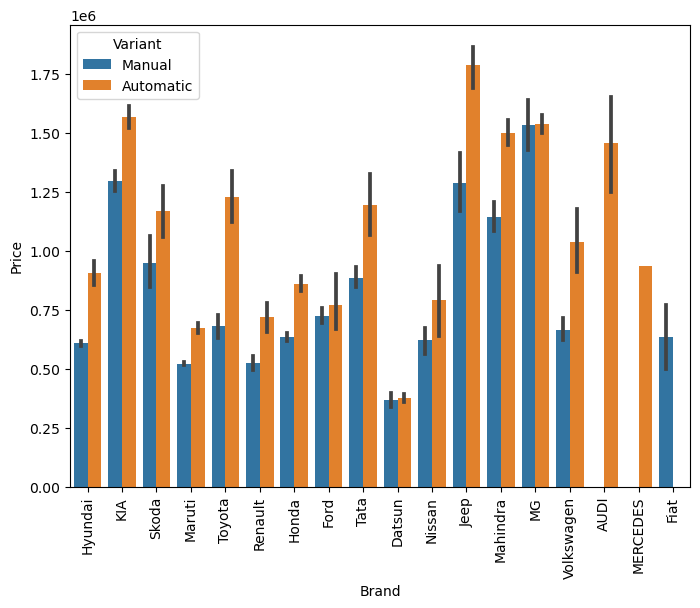

In [179]:
#Lets plot Brand With Price and Variant
plt.figure(figsize=(8,6))
sns.barplot(x='Brand',y='Price',hue='Variant',data=data)
plt.xticks(rotation=90)
plt.show()

Here , We cam see that as the price increases the Automatics are also increase.

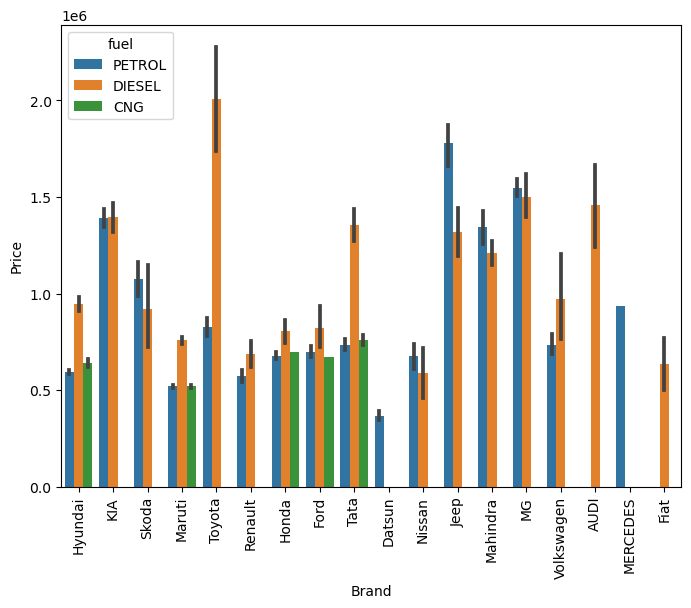

In [180]:
#Lets plot Brand With Price and Fuel
plt.figure(figsize=(8,6))
sns.barplot(x='Brand',y='Price',hue='fuel',data=data)
plt.xticks(rotation=90)
plt.show()

Here , We can see that Toyota have costly Diesel Car and Mercedes have only Petrol car and Fiat have only Diesel Car. and then all left compnay are equal in ratio.

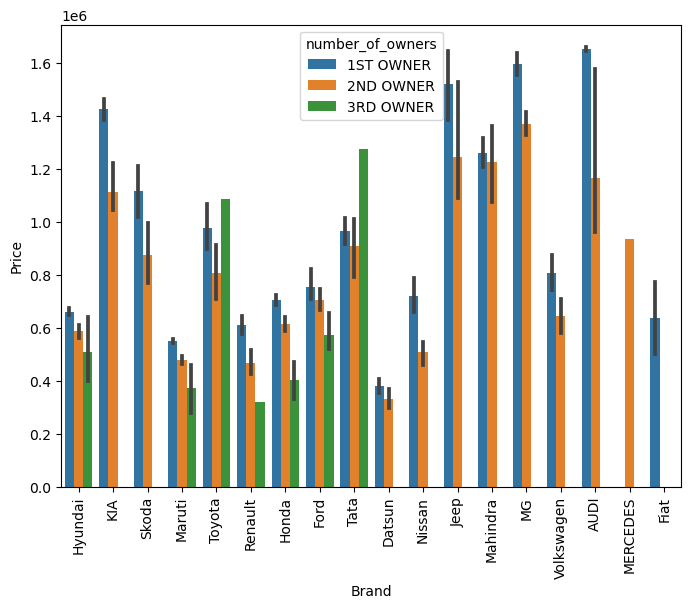

In [181]:
#Lets plot Brand With Price and Number of Owner
plt.figure(figsize=(8,6))
sns.barplot(x='Brand',y='Price',hue='number_of_owners',data=data)
plt.xticks(rotation=90)
plt.show()

Here we can see that maximum car come from 1st owner and we can also see that if the owner increases the price is getting low.

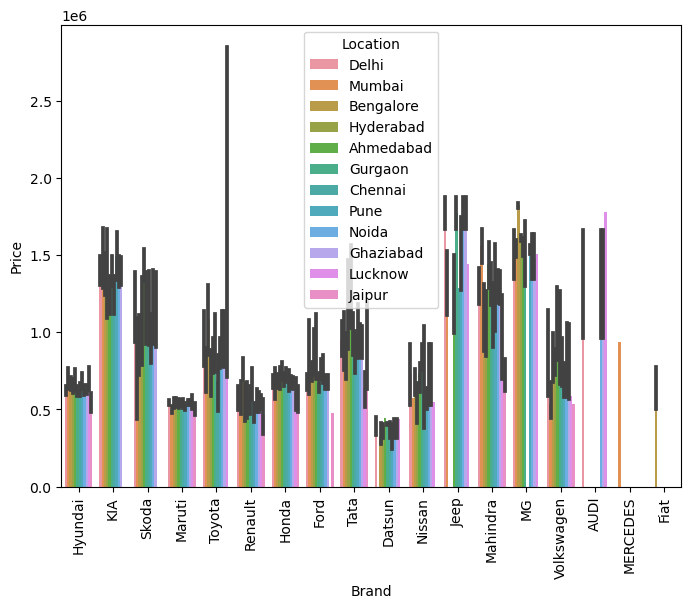

In [182]:
#Lets plot Brand With Price and Location
plt.figure(figsize=(8,6))
sns.barplot(x='Brand',y='Price',hue='Location',data=data)
plt.xticks(rotation=90)
plt.show()

Here We can see that the Metro City have more prices compare left City

In [183]:
#Lets plot Number of Owners With Price and Variant
plt.figure(figsize=(8,6))
sns.barplot(x='number_of_owners',y='Price',hue='Variant',data=data)
plt.xticks(rotation=90)
plt.show()

Here we can see that Automatic care are more sell by Owners .and Our Visualization part is over lets check for Dist and Box and Relation plot.

In [118]:
#Lets check data 
data.head()

Brand  Year_Model            Car_Name             Model    Variant  \
0  Hyundai      2010.0             ['I10']           ERA 1.1     Manual   
1      KIA      2020.0          ['SELTOS']       GTX+ 1.4 MT     Manual   
2      KIA      2020.0          ['SELTOS']   GTX + AT PETROL  Automatic   
3  Hyundai      2014.0  ['SANTRO', 'XING']           GL PLUS     Manual   
4    Skoda      2021.0          ['KUSHAQ']  STYLE 1.5 TSI MT     Manual   

     fuel number_of_owners      Price Location  Kilometer  
0  PETROL        1ST OWNER   168000.0    Delhi    46523.0  
1  PETROL        1ST OWNER  1689000.0    Delhi     6003.0  
2  PETROL        1ST OWNER  1673000.0    Delhi     9417.0  
3  PETROL        1ST OWNER   286000.0    Delhi    43944.0  
4  PETROL        1ST OWNER  1701000.0    Delhi     7182.0

Here we have to remove [ ] from car_name 

In [187]:
data ['Car_Name'] = data['Car_Name'].str.replace ("["," ") 

In [189]:
data ['Car_Name'] = data['Car_Name'].str.replace ("]"," ") 

In [191]:
data ['Car_Name'] = data['Car_Name'].str.replace ("'"," ") 

In [193]:
#Lets plot again to chek
data.tail()

Brand  Year_Model               Car_Name                  Model  \
8769  Maruti      2020.0       Suzuki ,  Eeco    5 STR WITH AC PLUSHTR   
8770  Maruti      2022.0    Suzuki ,  Celerio                      ZXI   
8771    Tata      2019.0         TIAGO ,  NRG                   PETROL   
8772  Maruti      2019.0       SUZUKI ,  ALTO                      LXI   
8773  Maruti      2015.0       Suzuki ,  Ciaz                      ZXI   

     Variant    fuel number_of_owners     Price Location  Kilometer  
8769  Manual  PETROL        1ST OWNER  478000.0   Jaipur    29553.0  
8770  Manual  PETROL        1ST OWNER  568000.0   Jaipur     7910.0  
8771  Manual  PETROL        1ST OWNER  485000.0   Jaipur    35787.0  
8772  Manual  PETROL        1ST OWNER  327000.0   Jaipur    37369.0  
8773  Manual  PETROL        1ST OWNER  633000.0   Jaipur    24565.0

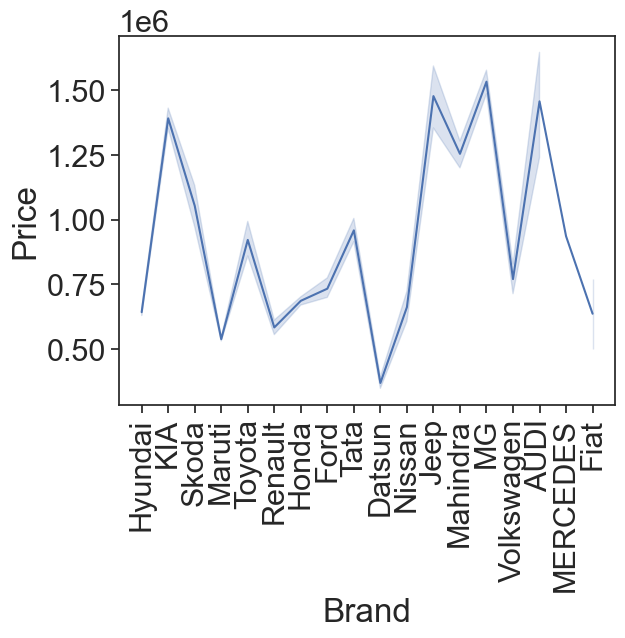

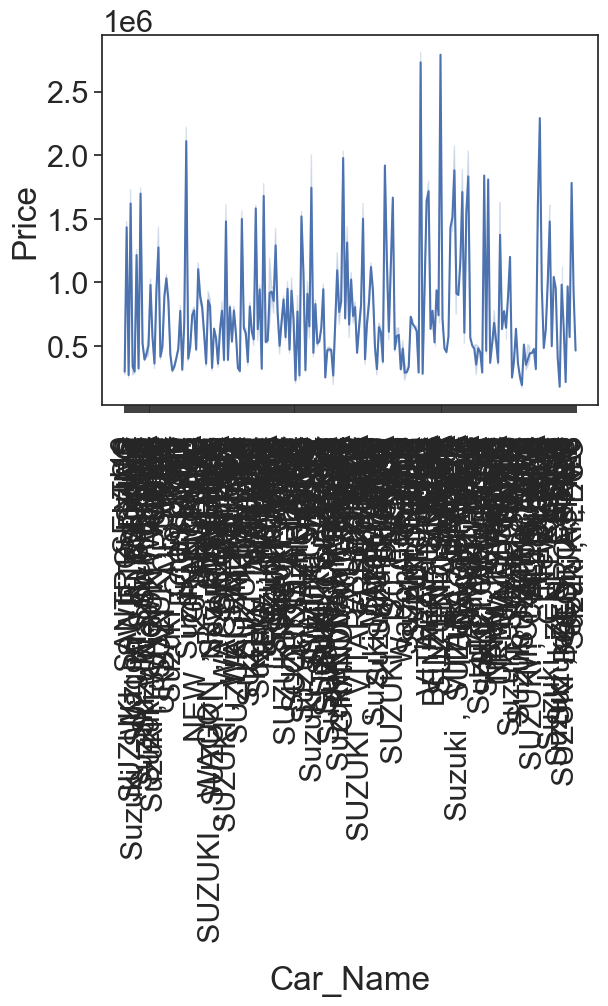

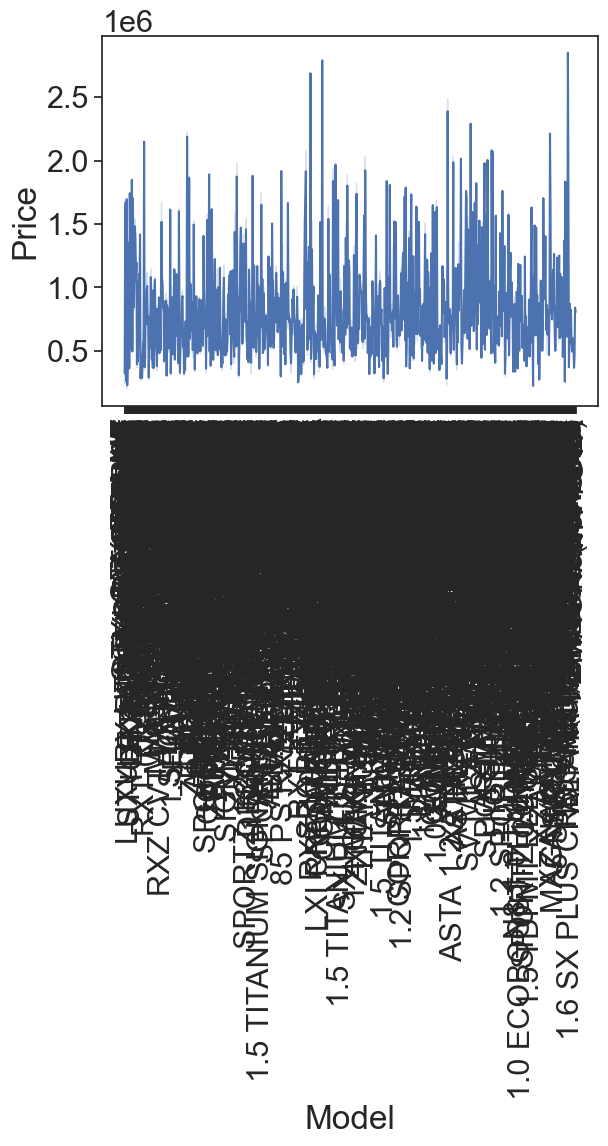

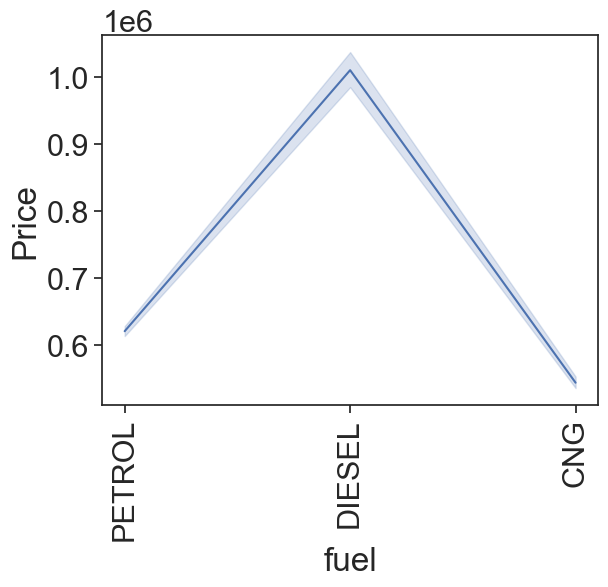

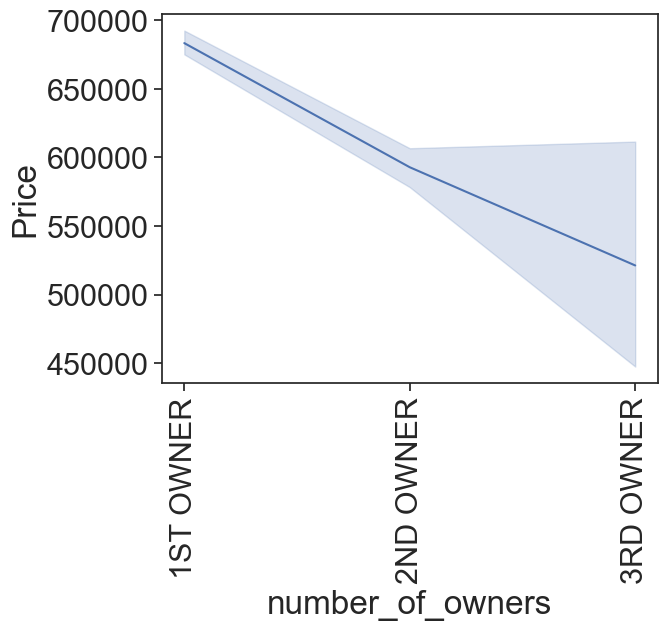

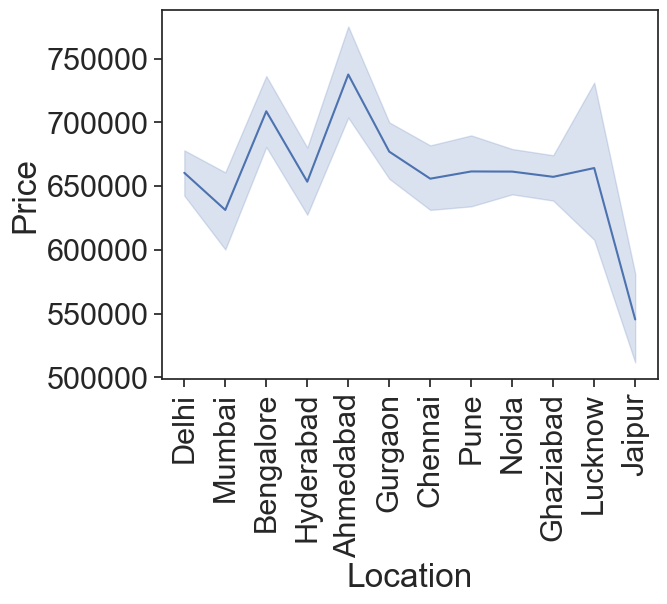

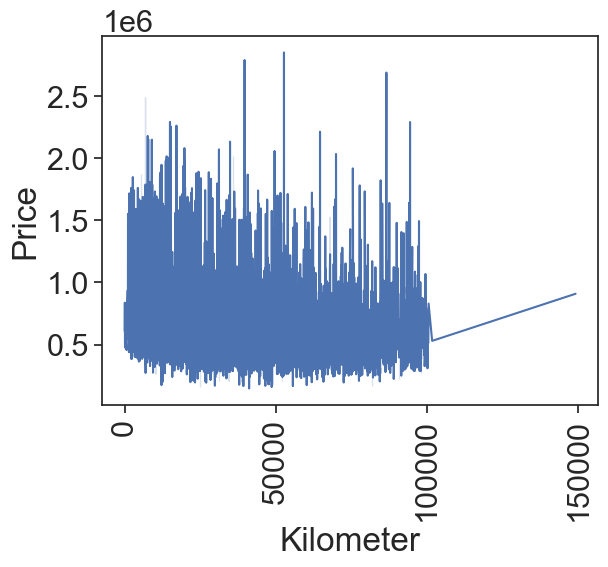

In [211]:
#Lets plot Rel Plot for checking the relation between feature and label
for i in data:
    plt.figure()
    sns.lineplot(x=data[i],y=data['Price'])
    plt.xticks(rotation=90)
    plt.show()

<Figure size 640x480 with 0 Axes>

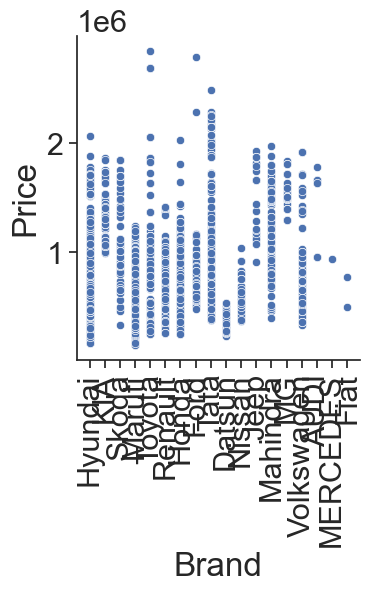

<Figure size 640x480 with 0 Axes>

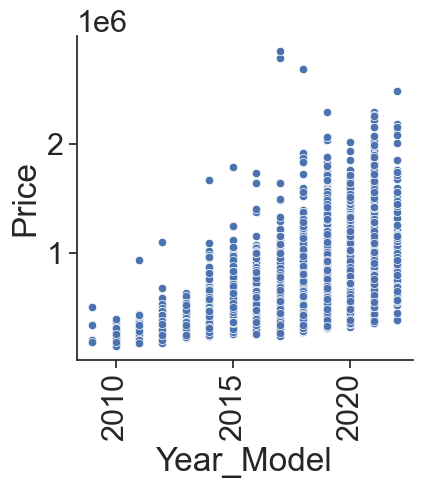

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

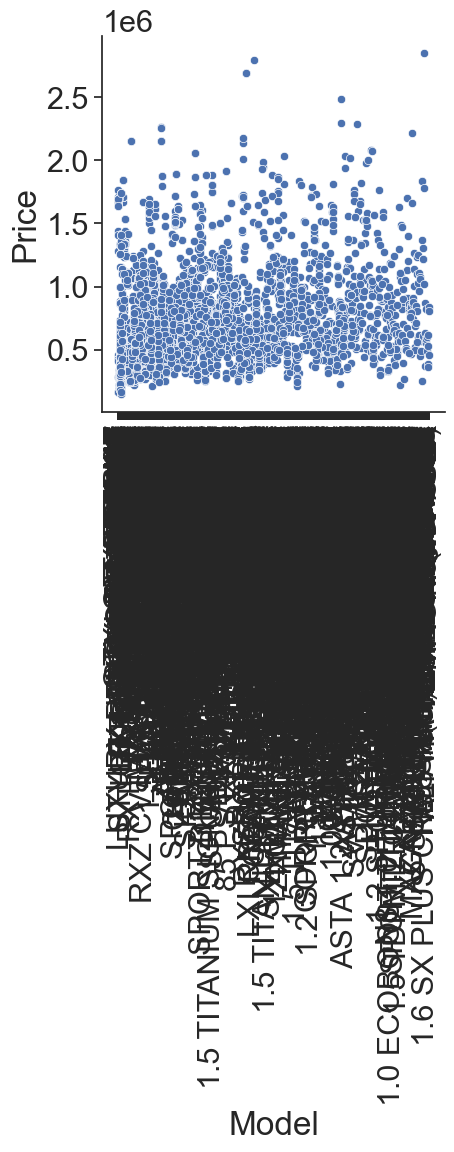

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

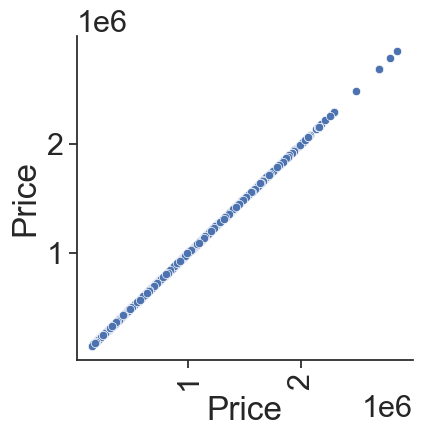

<Figure size 640x480 with 0 Axes>

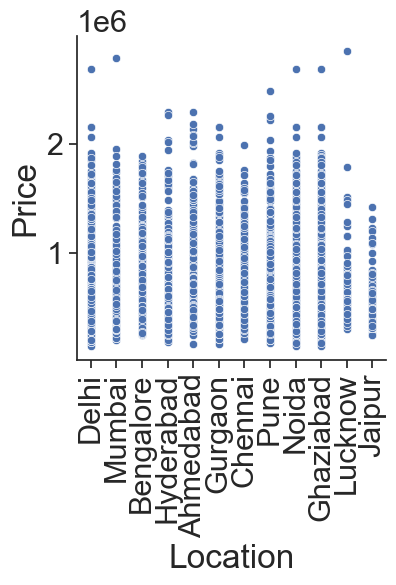

<Figure size 640x480 with 0 Axes>

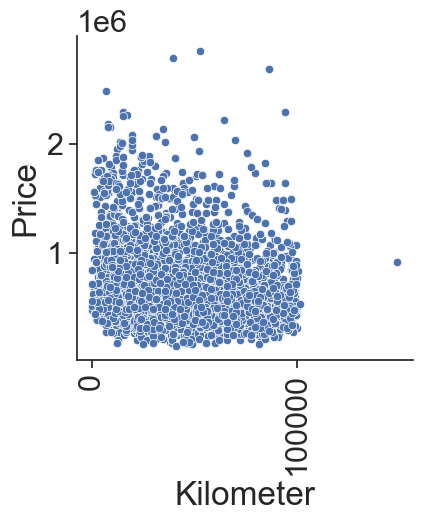

In [215]:
#Lets plot Rel Plot for checking the relation between feature and label
for i in data:
    plt.figure()
    sns.relplot(x=data[i],y=data['Price'],)
    plt.xticks(rotation=90)
    plt.show()

In [227]:
#Lets plot Dist Plot for checking the Distribution
sns.distplot(data['Kilometer'])

<AxesSubplot:xlabel='Kilometer', ylabel='Density'>

All most Normal Distributed

<AxesSubplot:xlabel='Year_Model', ylabel='Density'>

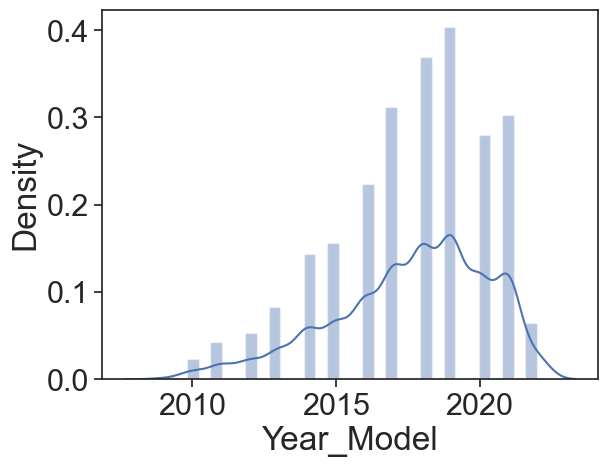

In [228]:
#Lets plot Dist Plot for checking the Distribution
sns.distplot(data['Year_Model'])

Left , Skewed but we dont have to right them because its year . we dont want any change .

<AxesSubplot:xlabel='Price', ylabel='Density'>

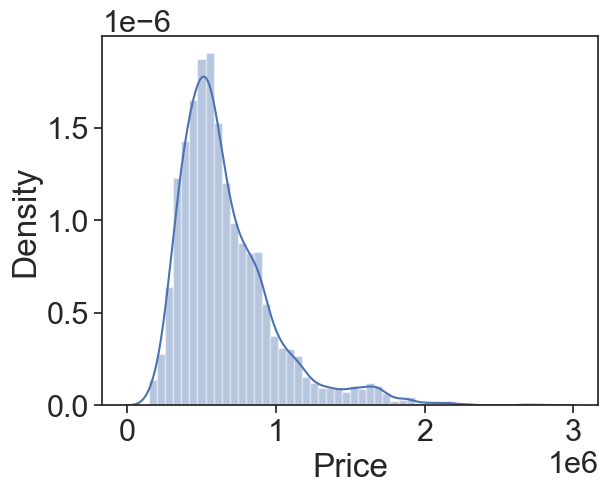

In [229]:
#Lets plot Dist Plot for checking the Distribution
sns.distplot(data['Price'])

Little bit Right Skewed. But we dont have correct them because its a target column

# Checking Outliers 

<AxesSubplot:xlabel='Kilometer'>

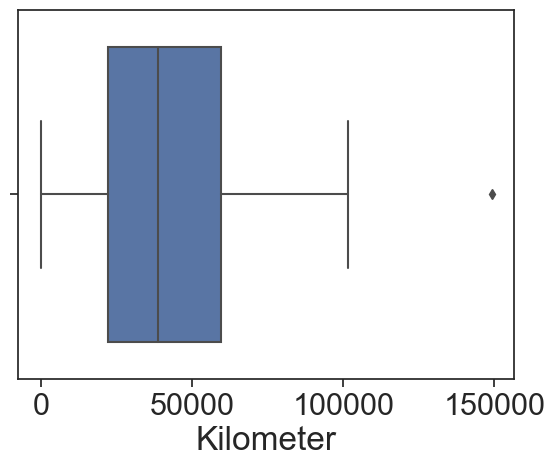

In [231]:
#Lets plot Dist Plot for checking the Distribution
sns.boxplot(data['Kilometer'])

We , Have outliers but we dont remove this because we consider 150000 KM any car can run

<AxesSubplot:xlabel='Year_Model'>

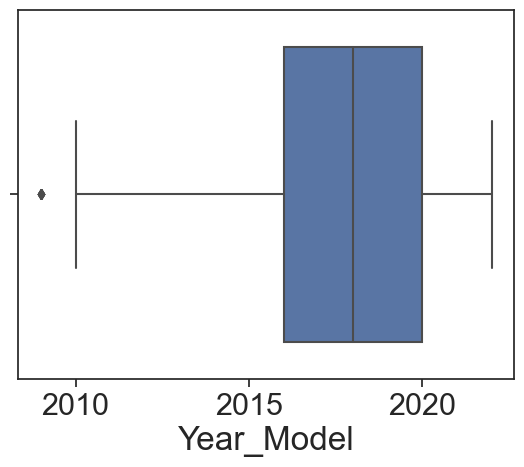

In [232]:
#Lets plot Dist Plot for checking the Distribution
sns.boxplot(data['Year_Model'])

Here , We have outlers . but we dont consider as a outlier beacuse beacuse 2010 model car are running in road . beacuse in india any motor vehicle life is for 15 Year.

<AxesSubplot:xlabel='Price'>

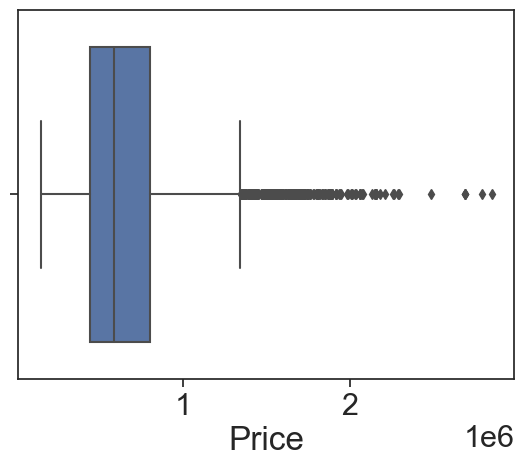

In [233]:
#Lets plot Dist Plot for checking the Distribution
sns.boxplot(data['Price'])

We, Have outlier but we dont correct them because we its a target column.

# Data Preprocessing 

In [234]:
from sklearn.preprocessing import LabelEncoder

In [235]:
#checking categorical columns
cat_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Brand', 'Car_Name', 'Model', 'Variant', 'fuel', 'number_of_owners', 'Location']


In [236]:
le=LabelEncoder()
data[cat_col]= data[cat_col].apply(le.fit_transform)
data

Brand  Year_Model  Car_Name  Model  Variant  fuel  number_of_owners  \
0         5      2010.0        76    327        1     2                 0   
1         7      2020.0       119    368        1     2                 0   
2         7      2020.0       119    362        0     2                 0   
3         5      2014.0       117    357        1     2                 0   
4        14      2021.0        84    601        1     2                 0   
...     ...         ...       ...    ...      ...   ...               ...   
8769     11      2020.0       168    215        1     2                 0   
8770     11      2022.0       162    850        1     2                 0   
8771     15      2019.0       196    480        1     2                 0   
8772     11      2019.0       123    423        1     2                 0   
8773     11      2015.0       164    850        1     2                 0   

          Price  Location  Kilometer  
0      168000.0         3    46523.0  
1     1689000.0         3     6003.0  
2     1673000.0         3     9417.0  
3      286000.0         3    43944.0  
4     1701000.0         3     7182.0  
...         ...       ...        ...  
8769   478000.0         7    29553.0  
8770   568000.0         7     7910.0  
8771   485000.0         7    35787.0  
8772   327000.0         7    37369.0  
8773   633000.0         7    24565.0  

[7506 rows x 10 columns]

In [237]:
#Lets check correlation
data.corr()

Brand  Year_Model  Car_Name     Model   Variant  \
Brand             1.000000    0.182009  0.392353  0.360135 -0.043080   
Year_Model        0.182009    1.000000  0.057833  0.008219 -0.121408   
Car_Name          0.392353    0.057833  1.000000  0.225735  0.048909   
Model             0.360135    0.008219  0.225735  1.000000  0.002307   
Variant          -0.043080   -0.121408  0.048909  0.002307  1.000000   
fuel             -0.093104   -0.209748 -0.129639  0.027068 -0.100526   
number_of_owners -0.057348   -0.225331 -0.019539 -0.025245 -0.032135   
Price             0.022898    0.503273 -0.106495 -0.052410 -0.379037   
Location          0.043438   -0.041311  0.032980  0.006971 -0.011565   
Kilometer        -0.080857   -0.478029 -0.055416 -0.026076  0.032238   

                      fuel  number_of_owners     Price  Location  Kilometer  
Brand            -0.093104         -0.057348  0.022898  0.043438  -0.080857  
Year_Model       -0.209748         -0.225331  0.503273 -0.041311  -0.478029  
Car_Name         -0.129639         -0.019539 -0.106495  0.032980  -0.055416  
Model             0.027068         -0.025245 -0.052410  0.006971  -0.026076  
Variant          -0.100526         -0.032135 -0.379037 -0.011565   0.032238  
fuel              1.000000          0.080241 -0.112264 -0.104065  -0.158360  
number_of_owners  0.080241          1.000000 -0.114115 -0.020474   0.120050  
Price            -0.112264         -0.114115  1.000000 -0.039480  -0.198956  
Location         -0.104065         -0.020474 -0.039480  1.000000  -0.001238  
Kilometer        -0.158360          0.120050 -0.198956 -0.001238   1.000000

In [238]:
#Lest check correlation with target columns in sorted values
data.corr()['Price']

Brand               0.022898
Year_Model          0.503273
Car_Name           -0.106495
Model              -0.052410
Variant            -0.379037
fuel               -0.112264
number_of_owners   -0.114115
Price               1.000000
Location           -0.039480
Kilometer          -0.198956
Name: Price, dtype: float64

Here , We can see that Year_Model ,Car_Name, Variant , Number_of_Owners and Kelometer have relation with Price


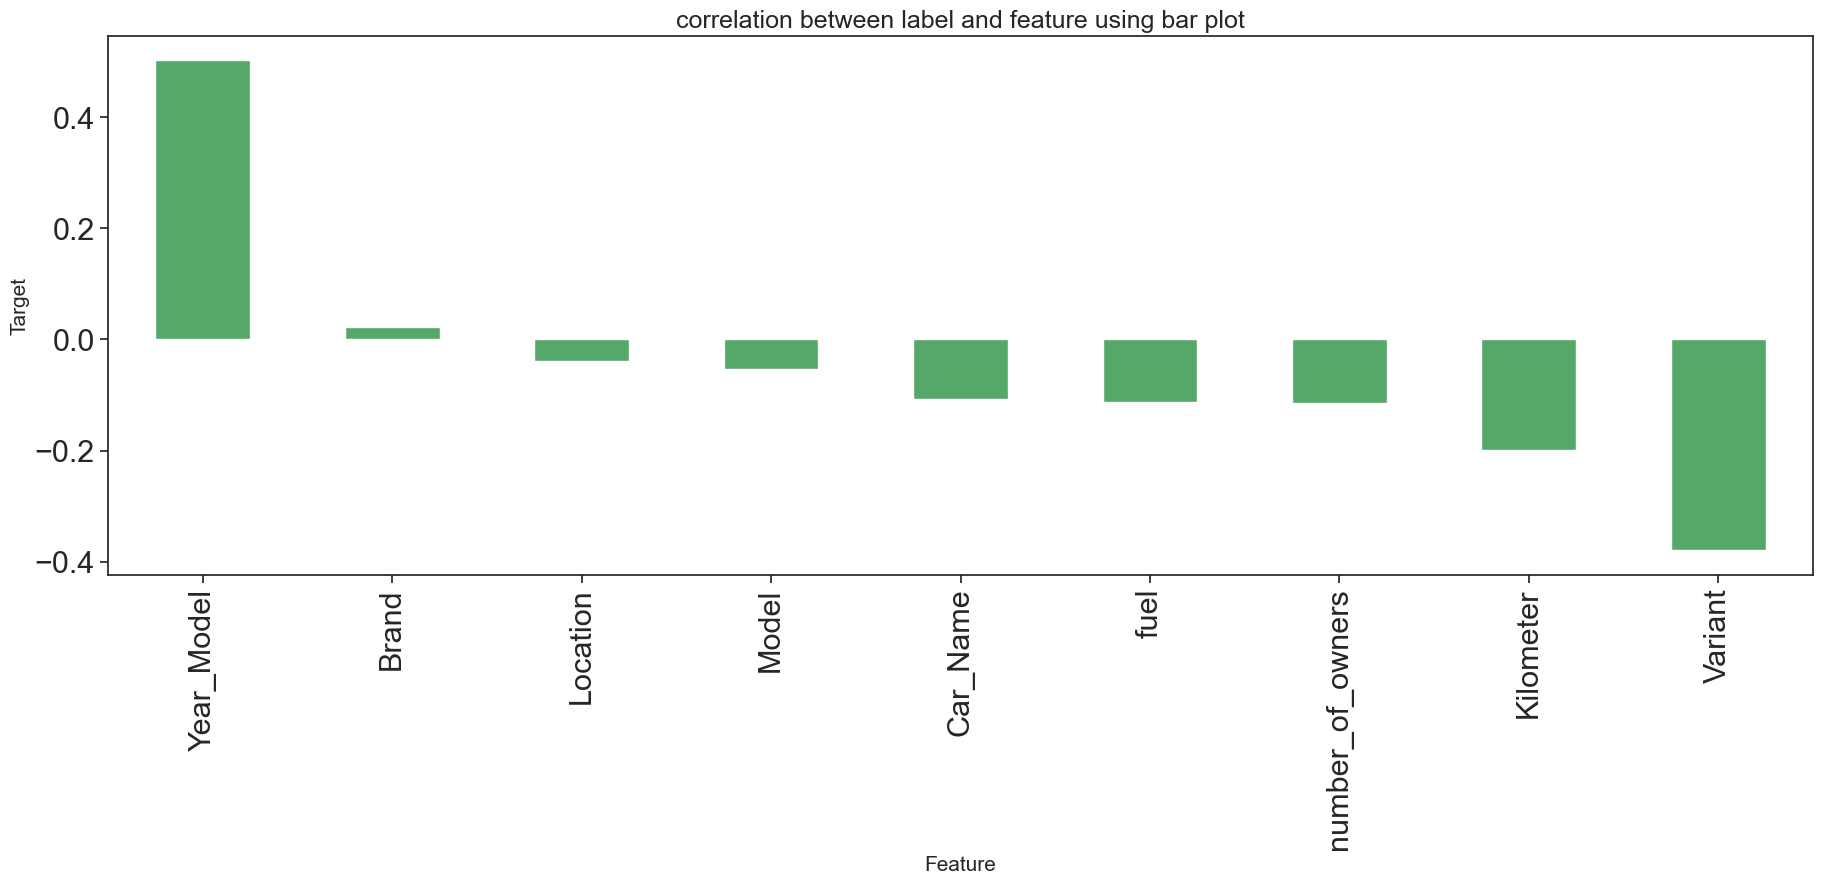

In [239]:
plt.figure(figsize=(22,7))
data.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

# Describing the Dataset

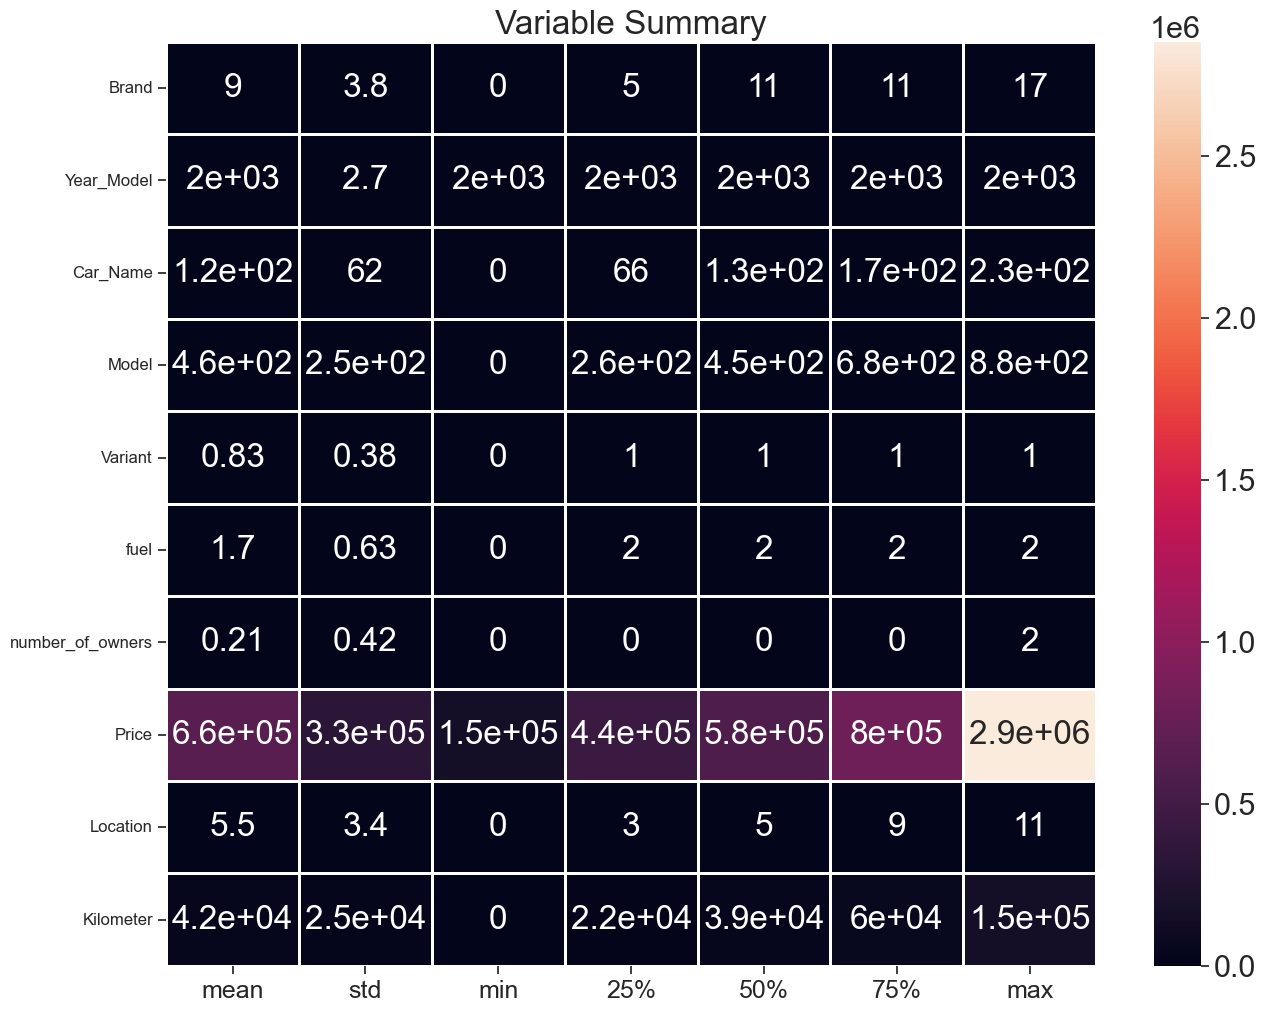

In [244]:
plt.figure(figsize=(15,12))
sns.heatmap(round(data.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt=".2g")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variable Summary")
plt.show()

# Separate X AND Y

In [246]:
#Lets separate x and y
x=data.drop(columns='Price')
y=data['Price']

In [247]:
x.skew()

Brand              -0.046207
Year_Model         -0.660787
Car_Name           -0.159842
Model              -0.208673
Variant            -1.747392
fuel               -1.825442
number_of_owners    1.660486
Location            0.284485
Kilometer           0.472916
dtype: float64

Here we set threshold for +/- 0.66. and we can see that our all continous variable comes in threshold range. So, We dont need no remove skewness. Lets move foreword

In [248]:
from sklearn.preprocessing import StandardScaler

In [250]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

Brand  Year_Model  Car_Name     Model   Variant      fuel  \
0    -1.046812   -2.845699 -0.718673 -0.533032  0.454274  0.495782   
1    -0.525057    0.885664 -0.023034 -0.366241  0.454274  0.495782   
2    -0.525057    0.885664 -0.023034 -0.390649 -2.201317  0.495782   
3    -1.046812   -1.353154 -0.055389 -0.410990  0.454274  0.495782   
4     1.301086    1.258801 -0.589252  0.581620  0.454274  0.495782   
...        ...         ...       ...       ...       ...       ...   
7501  0.518453    0.885664  0.769672 -0.988656  0.454274  0.495782   
7502  0.518453    1.631937  0.672606  1.594571  0.454274  0.495782   
7503  1.561963    0.512528  1.222647  0.089383  0.454274  0.495782   
7504  0.518453    0.512528  0.041677 -0.142497  0.454274  0.495782   
7505  0.518453   -0.980017  0.704961  1.594571  0.454274  0.495782   

      number_of_owners  Location  Kilometer  
0            -0.493542 -0.726571   0.179548  
1            -0.493542 -0.726571  -1.462792  
2            -0.493542 -0.726571  -1.324417  
3            -0.493542 -0.726571   0.075017  
4            -0.493542 -0.726571  -1.415005  
...                ...       ...        ...  
7501         -0.493542  0.448846  -0.508273  
7502         -0.493542  0.448846  -1.385498  
7503         -0.493542  0.448846  -0.255599  
7504         -0.493542  0.448846  -0.191478  
7505         -0.493542  0.448846  -0.710444  

[7506 rows x 9 columns]

In [251]:
from sklearn.feature_selection import SelectKBest, f_classif

In [252]:
bestfeat = SelectKBest(score_func = f_classif, k = 'all')
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [253]:
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(35,'Score'))

            Feature     Score
1        Year_Model  7.024376
4           Variant  4.642853
2          Car_Name  3.033332
0             Brand  2.673735
8         Kilometer  2.578511
3             Model  2.372160
5              fuel  2.306542
6  number_of_owners  2.210316
7          Location  0.867399


Here, We can find all the columns contributing in tha model building

# Lets Check With VIF

In [254]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [255]:
vif = pd.DataFrame()
vif["Features"] = x.columns
vif['vif'] = [variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif

Features       vif
0             Brand  1.354346
1        Year_Model  1.589933
2          Car_Name  1.218554
3             Model  1.170422
4           Variant  1.046532
5              fuel  1.221130
6  number_of_owners  1.060348
7          Location  1.023294
8         Kilometer  1.446738

Here we can set threshold for 10 . and all the column comes in our range. and we dont have multicollieanrity problem.. we are good to proceed

# Lets Build a Mode

In [256]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler

In [257]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 200):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)
    pred = rf.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.9618295947018536 on Random State 47


In [258]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=47)

In [260]:
regressors = {
    
    'Random Forest' : RandomForestRegressor(),
    
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]
results

MAE           MSE          RMSE  R2-score
Random Forest  32026.352  3.534310e+09  59450.060063     0.962

# Cross - Validation of the mode

In [261]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
lss  = r2_score(y_test,y_pred)

In [262]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    isscore = cross_val_score(rf,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 2
Cross validation score is:- 91.63615545638541
accuracy_score is:- 96.24886637403016


At cv:- 3
Cross validation score is:- 92.14857040403369
accuracy_score is:- 96.24886637403016


At cv:- 4
Cross validation score is:- 92.55654112634481
accuracy_score is:- 96.24886637403016


At cv:- 5
Cross validation score is:- 92.67756848006522
accuracy_score is:- 96.24886637403016


At cv:- 6
Cross validation score is:- 92.46948786378627
accuracy_score is:- 96.24886637403016


At cv:- 7
Cross validation score is:- 92.74395865402224
accuracy_score is:- 96.24886637403016


At cv:- 8
Cross validation score is:- 92.90259252063808
accuracy_score is:- 96.24886637403016


At cv:- 9
Cross validation score is:- 93.51226782552514
accuracy_score is:- 96.24886637403016




# Gradient Boosting Regressor

In [263]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 200):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    gbr = GradientBoostingRegressor()
    gbr.fit(X_train, y_train)
    pred = gbr.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

In [264]:
print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.8677516956569649 on Random State 163


In [265]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=163)

In [266]:
regressors = {
    
    'Gradient Boost Regressor' : GradientBoostingRegressor(),
    
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [267]:
results

MAE           MSE           RMSE  R2-score
Gradient Boost Regressor  83556.295  1.438641e+10  119943.372558     0.868

In [268]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)
from sklearn.model_selection import cross_val_score
lss  = r2_score(y_test,y_pred)

In [269]:
for j in range(2,10):
    isscore = cross_val_score(gbr,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 2
Cross validation score is:- 83.45353424244013
accuracy_score is:- 86.77516956569649


At cv:- 3
Cross validation score is:- 82.95924673556914
accuracy_score is:- 86.77516956569649


At cv:- 4
Cross validation score is:- 82.61873102559886
accuracy_score is:- 86.77516956569649


At cv:- 5
Cross validation score is:- 83.49037961102243
accuracy_score is:- 86.77516956569649


At cv:- 6
Cross validation score is:- 82.95765982312652
accuracy_score is:- 86.77516956569649


At cv:- 7
Cross validation score is:- 82.86882323966582
accuracy_score is:- 86.77516956569649


At cv:- 8
Cross validation score is:- 82.83813233607545
accuracy_score is:- 86.77516956569649


At cv:- 9
Cross validation score is:- 83.2515631711249
accuracy_score is:- 86.77516956569649




In [270]:
lsscore_selected = cross_val_score(gbr,x,y,cv=2).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.8343073483675796 
The accuracy score is:  0.8677516956569649


# XGB

In [296]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(0, 200):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    xgb = XGBRegressor()
    xgb.fit(X_train, y_train)
    pred = xgb.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.9666753412082753 on Random State 89


In [297]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=89)

In [298]:
regressors = {
    
    'Random Forest' : RandomForestRegressor(),
    
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [299]:
results

MAE           MSE          RMSE  R2-score
Random Forest  34867.896  4.600752e+09  67828.846868     0.957

# Cross - Validation of the mode

In [300]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)
lss  = r2_score(y_test,y_pred)

In [301]:
for j in range(2,10):
    isscore = cross_val_score(xgb,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 2
Cross validation score is:- 93.39758242200362
accuracy_score is:- 96.66753412082753


At cv:- 3
Cross validation score is:- 93.61018159216276
accuracy_score is:- 96.66753412082753


At cv:- 4
Cross validation score is:- 93.34463608401006
accuracy_score is:- 96.66753412082753


At cv:- 5
Cross validation score is:- 93.76125918867416
accuracy_score is:- 96.66753412082753


At cv:- 6
Cross validation score is:- 94.00913812163343
accuracy_score is:- 96.66753412082753


At cv:- 7
Cross validation score is:- 93.77947293186402
accuracy_score is:- 96.66753412082753


At cv:- 8
Cross validation score is:- 94.14571297475337
accuracy_score is:- 96.66753412082753


At cv:- 9
Cross validation score is:- 94.42776258211573
accuracy_score is:- 96.66753412082753




In [302]:
from sklearn.model_selection import cross_val_score
lsscore_selected = cross_val_score(xgb,x,y,cv=9).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.9442776258211573 
The accuracy score is:  0.9666753412082753


# Linear Regression 

In [283]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(0, 1000):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.4159636888636634 on Random State 902


In [284]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=902)

In [285]:
regressors = {
    
    'Linear Regression' : LinearRegression(),
    
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [287]:
results

MAE           MSE           RMSE  R2-score
Linear Regression  190694.055  6.793797e+10  260649.123643     0.416

# Cross - Validation of the mode

In [289]:
lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)
lss  = r2_score(y_test,y_pred)

In [290]:
for j in range(10,20):
    isscore = cross_val_score(lr,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 10
Cross validation score is:- 35.84610262687925
accuracy_score is:- 41.59636888636634


At cv:- 11
Cross validation score is:- 35.72210052658415
accuracy_score is:- 41.59636888636634


At cv:- 12
Cross validation score is:- 35.56427266037295
accuracy_score is:- 41.59636888636634


At cv:- 13
Cross validation score is:- 35.23513592554093
accuracy_score is:- 41.59636888636634


At cv:- 14
Cross validation score is:- 34.83246958117099
accuracy_score is:- 41.59636888636634


At cv:- 15
Cross validation score is:- 35.159505440016865
accuracy_score is:- 41.59636888636634


At cv:- 16
Cross validation score is:- 34.98086533513791
accuracy_score is:- 41.59636888636634


At cv:- 17
Cross validation score is:- 35.08699840865572
accuracy_score is:- 41.59636888636634


At cv:- 18
Cross validation score is:- 34.5358009851052
accuracy_score is:- 41.59636888636634


At cv:- 19
Cross validation score is:- 34.749087957945605
accuracy_score is:- 41.59636888636634




In [292]:
from sklearn.model_selection import cross_val_score
lsscore_selected = cross_val_score(lr,x,y,cv=13).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.3523513592554093 
The accuracy score is:  0.4159636888636634


# Hyperparameter tuning

In [293]:
from sklearn.model_selection import GridSearchCV

In [303]:
from sklearn.model_selection import cross_val_score
lsscore_selected = cross_val_score(xgb,x,y,cv=9).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.9442776258211573 
The accuracy score is:  0.9666753412082753


In [304]:
xgb = XGBRegressor()

In [305]:
parameters = {'n_estimators' : [100,200 ],
              
             'max_depth':range(4,8),
             'learning_rate':[0.1,0.3],
          'max_leaves':[1,5]}

In [306]:
grd = GridSearchCV(xgb,param_grid = parameters)
grd.fit(X_train,y_train)

print('Best Params ',grd.best_params_)

Best Params  {'learning_rate': 0.3, 'max_depth': 5, 'max_leaves': 1, 'n_estimators': 200}


In [307]:
gbr = XGBRegressor(learning_rate= 0.1, max_depth= 8, max_leaves= 9, n_estimators= 100)

gbr.fit(X_train,y_train)

pred = gbr.predict(X_test)

r2_score(y_test,pred)

0.9650758514032044

# Plot Actual VS Predicted

In [308]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred)
plt.plot(y_test,y_test)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [309]:
import pickle
filename=('Car Price Prediction Original')
pickle.dump(gbr,open(filename,'wb'))

In [311]:
loaded_model=pickle.load(open('Car Price Prediction Original','rb'))
result=loaded_model.score(X_test,y_test)
print(result*100)

96.50758514032044


In [312]:
conclusion=pd.DataFrame([loaded_model.predict(X_train)[:],pred[:]],index=['predicted','original'])

In [313]:
conclusion

0            1             2             3            4     \
predicted  772702.18750  463412.3125  335699.53125  558856.56250  771722.3125   
original   337390.46875  581438.1875  722810.00000  333122.03125  518067.4375   

                5             6             7             8            9     \
predicted  1172614.0  518090.90625  396989.59375  498133.09375  733483.0000   
original    607277.0  634050.43750  709067.43750  258514.78125  607674.0625   

           ...         5994         5995         5996         5997  \
predicted  ...  1334645.875  823004.8125  618839.1875  806091.1875   
original   ...          NaN          NaN          NaN          NaN   

                  5998        5999      6000       6001         6002  \
predicted  877532.5625  567528.125  379144.0  832936.25  149477.9375   
original           NaN         NaN       NaN        NaN          NaN   

                   6003  
predicted  450719.65625  
original            NaN  

[2 rows x 6004 columns]

In [ ]:
#Student of DataTrained 
#Student of Data Science - Saurav
#Date - 08-02-2023
#Time -> 12:48